# Assignment2 - <font color = 'hotpink'>MORGAN KAISER</font>

In this assignment, you will be analyzing data from LendingClub.com (www.lendingclub.com). Lending Club connects people who need money (borrowers) with people who have money (investors). Investors want to invest in people who are more likely to pay the investor back. Using the lending data from 2007-2010 and you need to predict whether or not the borrower paid back their loan in full. The final model should minimize the number of borrowers who actually did not pay back their load in full but predicted as they did (this is our model selection criteria).

You need to create a Random Forest model and a Support Vector model using the same training/testing data. For both models, you need to optimize the parameters using a Grid Search. 
- For random forest, test the following n_estimators values: 10, 50, 100, 200, 300, 500, 800
- For svm, test the following:
    - C values: 0.1,1,10
    - gamma values: "auto","scale",
    - kernel: "poly",'linear','rbf'
    
Do not drop any of the features and make sure to scale them using StandardScaler (otherwise GridSearch for SVM will take a very very long time)

At the very bottom of your notebook, please explain how your models have performed and which model performed the best given the criteria.

Here are what the columns in the data represent:
* credit.policy: 1 if the customer meets the credit underwriting criteria of LendingClub.com, and 0 otherwise.
* purpose: The purpose of the loan (takes values "credit_card", "debt_consolidation", "educational", "major_purchase", "small_business", and "all_other").
* int.rate: The interest rate of the loan, as a proportion. Borrowers judged by LendingClub.com to be more risky are assigned higher interest rates.
* installment: The monthly installments owed by the borrower if the loan is funded.
* log.annual.inc: The natural log of the self-reported annual income of the borrower.
* dti: The debt-to-income ratio of the borrower (amount of debt divided by annual income).
* fico: The FICO credit score of the borrower.
* days.with.cr.line: The number of days the borrower has had a credit line.
* revol.bal: The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle).
* revol.util: The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available).
* inq.last.6mths: The borrower's number of inquiries by creditors in the last 6 months.
* delinq.2yrs: The number of times the borrower had been 30+ days past due on a payment in the past 2 years.
* pub.rec: The borrower's number of derogatory public records (bankruptcy filings, tax liens, or judgments).
* not.fully.paid: 1 if the borrower did not pay back their loan in full, 0 if they paid back their loan in full.




# Import Libraries


In [1]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline
print('libraries have been imported.')

libraries have been imported.


# Get the Data



In [2]:
df = pd.read_csv('loan_data.csv')
print(df.head())

   credit.policy             purpose  int.rate  installment  log.annual.inc  \
0              1  debt_consolidation    0.1670       674.53       10.887437   
1              1           all_other    0.0740        82.31        9.210340   
2              1           all_other    0.1218       166.50       10.915088   
3              1  debt_consolidation    0.1287       420.42       10.545341   
4              1  debt_consolidation    0.1114        82.01       11.156251   

     dti  fico  days.with.cr.line  revol.bal  revol.util  inq.last.6mths  \
0  19.87   667        3904.958333      17176        73.4               1   
1   1.20   807        3899.958333         82         2.3               0   
2  22.45   702        1800.000000      16957        67.0               3   
3  10.39   707        3119.958333      12343        67.8               0   
4  18.09   712        8130.000000      14482        84.2               0   

   delinq.2yrs  pub.rec  not.fully.paid  
0            0        0   

In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
credit.policy        9578 non-null int64
purpose              9578 non-null object
int.rate             9578 non-null float64
installment          9578 non-null float64
log.annual.inc       9578 non-null float64
dti                  9578 non-null float64
fico                 9578 non-null int64
days.with.cr.line    9578 non-null float64
revol.bal            9578 non-null int64
revol.util           9578 non-null float64
inq.last.6mths       9578 non-null int64
delinq.2yrs          9578 non-null int64
pub.rec              9578 non-null int64
not.fully.paid       9578 non-null int64
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB
None


So we're working with 14 cols, 9578 rows/entries, and no null values. Peep the *purpose* column - it is of object dtype. we will most likely need to convert this col later on.

In [4]:
print(df.describe())

       credit.policy     int.rate  installment  log.annual.inc          dti  \
count    9578.000000  9578.000000  9578.000000     9578.000000  9578.000000   
mean        0.750783     0.125528   322.757966       10.928091    12.805928   
std         0.432582     0.027050   210.603178        0.626615     6.926247   
min         0.000000     0.060000    15.670000        7.547502     0.000000   
25%         1.000000     0.109900   164.562500       10.545447     7.382500   
50%         1.000000     0.125300   270.410000       10.915088    12.900000   
75%         1.000000     0.142600   444.560000       11.289832    18.180000   
max         1.000000     0.216400   940.140000       14.180154    29.960000   

              fico  days.with.cr.line     revol.bal   revol.util  \
count  9578.000000        9578.000000  9.578000e+03  9578.000000   
mean    708.647004        4531.012359  1.790938e+04    47.812683   
std      37.836367        2507.372905  3.855329e+04    29.131930   
min     612.0000

# Exploratory Data Analysis

Verifying there are 0 nulls in dataset...

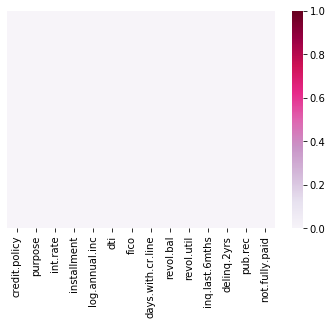

In [5]:
heat_map = sns.heatmap(df.isnull(), yticklabels = False, cbar = True, cmap = "PuRd", vmin = 0, vmax = 1)

plt.show()

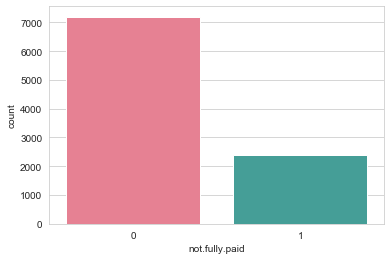

In [6]:
# a countplot shows the counts of observations in each categorical bin using bars
# think of it as a histogram across a categorical, instead of quantitative, variable

sns.set_style("whitegrid")
sns.countplot(data = df, x = 'not.fully.paid', palette = 'husl')

Looks like a majority pays their loans back in full.

# Data Cleaning

Need to convert df['purpose'] to numerical values. If this isn't done, then a **ValueError: could not convert string to float: 'all_other'** will be thrown when running Random Forest model. 

*From Dr. Ozturk's titanic exercise:*

*We'll need to convert categorical features to dummy variables using pandas! Otherwise our machine learning algorithm won't be able to directly take in those features as inputs.*

In [7]:
purpose = pd.get_dummies(df["purpose"])

In [8]:
purpose.head()

,all_other,credit_card,debt_consolidation,educational,home_improvement,major_purchase,small_business
0,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0
2,1,0,0,0,0,0,0
3,0,0,1,0,0,0,0
4,0,0,1,0,0,0,0


In [9]:
# adding col back to df 

df2 = pd.concat([df, purpose], axis=1)
df2.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,...,delinq.2yrs,pub.rec,not.fully.paid,all_other,credit_card,debt_consolidation,educational,home_improvement,major_purchase,small_business
0,1,debt_consolidation,0.1670,674.53,10.887437,19.87,667,3904.958333,17176,73.4,...,0,0,1,0,0,1,0,0,0,0
1,1,all_other,0.0740,82.31,9.210340,1.20,807,3899.958333,82,2.3,...,0,0,1,1,0,0,0,0,0,0
2,1,all_other,0.1218,166.50,10.915088,22.45,702,1800.000000,16957,67.0,...,0,0,1,1,0,0,0,0,0,0
3,1,debt_consolidation,0.1287,420.42,10.545341,10.39,707,3119.958333,12343,67.8,...,0,0,1,0,0,1,0,0,0,0
4,1,debt_consolidation,0.1114,82.01,11.156251,18.09,712,8130.000000,14482,84.2,...,0,0,1,0,0,1,0,0,0,0


In [10]:
df2.drop(["purpose"], axis=1, inplace=True)

In [11]:
df2.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,all_other,credit_card,debt_consolidation,educational,home_improvement,major_purchase,small_business
0,1,0.1670,674.53,10.887437,19.87,667,3904.958333,17176,73.4,1,0,0,1,0,0,1,0,0,0,0
1,1,0.0740,82.31,9.210340,1.20,807,3899.958333,82,2.3,0,0,0,1,1,0,0,0,0,0,0
2,1,0.1218,166.50,10.915088,22.45,702,1800.000000,16957,67.0,3,0,0,1,1,0,0,0,0,0,0
3,1,0.1287,420.42,10.545341,10.39,707,3119.958333,12343,67.8,0,0,0,1,0,0,1,0,0,0,0
4,1,0.1114,82.01,11.156251,18.09,712,8130.000000,14482,84.2,0,0,0,1,0,0,1,0,0,0,0


# Train Test Split


In [12]:
from sklearn.model_selection import train_test_split

X = df2.drop('not.fully.paid', axis=1)
y = df2['not.fully.paid']

In [13]:
# scaling all features - important step here! 

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_scaled = sc.fit_transform(X)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.30)

# Training - <font color = 'hotpink'>RANDOM FOREST</font>


In [15]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(random_state=42)
rfc.fit(X_train, y_train)

C:\Users\Morgan Kaiser\Anaconda3\Anaconda\New folder\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

# Predictions and Evaluation - <font color = 'hotpink'>RANDOM FOREST</font>


In [16]:
rfc_pred = rfc.predict(X_test)

In [17]:
from sklearn.metrics import classification_report,confusion_matrix

print(confusion_matrix(y_test,rfc_pred))

[[2047  113]
 [ 348  366]]


In [18]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

           0       0.85      0.95      0.90      2160
           1       0.76      0.51      0.61       714

    accuracy                           0.84      2874
   macro avg       0.81      0.73      0.76      2874
weighted avg       0.83      0.84      0.83      2874



# Grid Search - <font color = 'hotpink'>RANDOM FOREST</font>

*For random forest, test the following n_estimators values: 10, 50, 100, 200, 300, 500, 800*

In [20]:
random_param_grid = {'n_estimators': [10, 50, 100, 200, 300, 500, 800],
                    'max_depth': [4, 5, 6, 7, 8],
                    'criterion': ['entropy', 'gini']}

In [21]:
from sklearn.model_selection import GridSearchCV

In [22]:
# change svc() call to estimator = rfc aka randomforest classifier 
# variable defined earlier

random_grid = GridSearchCV(estimator = rfc, param_grid = random_param_grid, verbose=3)

In [23]:
random_grid.fit(X_train,y_train)

C:\Users\Morgan Kaiser\Anaconda3\Anaconda\New folder\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


Fitting 3 folds for each of 70 candidates, totalling 210 fits
[CV] criterion=entropy, max_depth=4, n_estimators=10 .................
[CV]  criterion=entropy, max_depth=4, n_estimators=10, score=0.755, total=   0.1s
[CV] criterion=entropy, max_depth=4, n_estimators=10 .................
[CV]  criterion=entropy, max_depth=4, n_estimators=10, score=0.754, total=   0.0s
[CV] criterion=entropy, max_depth=4, n_estimators=10 .................
[CV]  criterion=entropy, max_depth=4, n_estimators=10, score=0.756, total=   0.0s
[CV] criterion=entropy, max_depth=4, n_estimators=50 .................
[CV]  criterion=entropy, max_depth=4, n_estimators=50, score=0.753, total=   0.2s
[CV] criterion=entropy, max_depth=4, n_estimators=50 .................
[CV]  criterion=entropy, max_depth=4, n_estimators=50, score=0.755, total=   0.2s
[CV] criterion=entropy, max_depth=4, n_estimators=50 .................
[CV]  criterion=entropy, max_depth=4, n_estimators=50, score=0.752, total=   0.3s
[CV] criterion=entro

[CV]  criterion=entropy, max_depth=6, n_estimators=200, score=0.765, total=   0.9s
[CV] criterion=entropy, max_depth=6, n_estimators=300 ................
[CV]  criterion=entropy, max_depth=6, n_estimators=300, score=0.761, total=   1.3s
[CV] criterion=entropy, max_depth=6, n_estimators=300 ................
[CV]  criterion=entropy, max_depth=6, n_estimators=300, score=0.762, total=   1.3s
[CV] criterion=entropy, max_depth=6, n_estimators=300 ................
[CV]  criterion=entropy, max_depth=6, n_estimators=300, score=0.765, total=   1.3s
[CV] criterion=entropy, max_depth=6, n_estimators=500 ................
[CV]  criterion=entropy, max_depth=6, n_estimators=500, score=0.759, total=   2.2s
[CV] criterion=entropy, max_depth=6, n_estimators=500 ................
[CV]  criterion=entropy, max_depth=6, n_estimators=500, score=0.763, total=   2.2s
[CV] criterion=entropy, max_depth=6, n_estimators=500 ................
[CV]  criterion=entropy, max_depth=6, n_estimators=500, score=0.763, total= 

[CV]  criterion=gini, max_depth=4, n_estimators=50, score=0.753, total=   0.2s
[CV] criterion=gini, max_depth=4, n_estimators=50 ....................
[CV]  criterion=gini, max_depth=4, n_estimators=50, score=0.754, total=   0.1s
[CV] criterion=gini, max_depth=4, n_estimators=50 ....................
[CV]  criterion=gini, max_depth=4, n_estimators=50, score=0.753, total=   0.2s
[CV] criterion=gini, max_depth=4, n_estimators=100 ...................
[CV]  criterion=gini, max_depth=4, n_estimators=100, score=0.754, total=   0.3s
[CV] criterion=gini, max_depth=4, n_estimators=100 ...................
[CV]  criterion=gini, max_depth=4, n_estimators=100, score=0.756, total=   0.3s
[CV] criterion=gini, max_depth=4, n_estimators=100 ...................
[CV]  criterion=gini, max_depth=4, n_estimators=100, score=0.753, total=   0.3s
[CV] criterion=gini, max_depth=4, n_estimators=200 ...................
[CV]  criterion=gini, max_depth=4, n_estimators=200, score=0.753, total=   0.6s
[CV] criterion=gi

[CV]  criterion=gini, max_depth=6, n_estimators=500, score=0.764, total=   1.9s
[CV] criterion=gini, max_depth=6, n_estimators=500 ...................
[CV]  criterion=gini, max_depth=6, n_estimators=500, score=0.766, total=   1.9s
[CV] criterion=gini, max_depth=6, n_estimators=800 ...................
[CV]  criterion=gini, max_depth=6, n_estimators=800, score=0.763, total=   3.1s
[CV] criterion=gini, max_depth=6, n_estimators=800 ...................
[CV]  criterion=gini, max_depth=6, n_estimators=800, score=0.765, total=   3.1s
[CV] criterion=gini, max_depth=6, n_estimators=800 ...................
[CV]  criterion=gini, max_depth=6, n_estimators=800, score=0.764, total=   3.1s
[CV] criterion=gini, max_depth=7, n_estimators=10 ....................
[CV]  criterion=gini, max_depth=7, n_estimators=10, score=0.768, total=   0.1s
[CV] criterion=gini, max_depth=7, n_estimators=10 ....................
[CV]  criterion=gini, max_depth=7, n_estimators=10, score=0.774, total=   0.1s
[CV] criterion=g

[Parallel(n_jobs=1)]: Done 210 out of 210 | elapsed:  4.2min finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=10, n_jobs=None,
                                              oob_score=False, random_state=42,
                                              verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={

In [24]:
random_grid.best_params_

{'criterion': 'gini', 'max_depth': 8, 'n_estimators': 300}

In [25]:
random_grid.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=8, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

**Re-running predictions...**

In [26]:
random_grid_predictions = random_grid.predict(X_test)

In [27]:
print(confusion_matrix(y_test,random_grid_predictions))

[[2118   42]
 [ 591  123]]


In [28]:
print(classification_report(y_test,random_grid_predictions))

              precision    recall  f1-score   support

           0       0.78      0.98      0.87      2160
           1       0.75      0.17      0.28       714

    accuracy                           0.78      2874
   macro avg       0.76      0.58      0.57      2874
weighted avg       0.77      0.78      0.72      2874



***

# Training - <font color = 'hotpink'>SVM</font>

In [30]:
from sklearn.svm import SVC

In [31]:
model = SVC()

In [32]:
model.fit(X_train,y_train)

C:\Users\Morgan Kaiser\Anaconda3\Anaconda\New folder\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

# Predictions and Evaluation - <font color = 'hotpink'>SVM</font>

In [33]:
predictions = model.predict(X_test)

In [34]:
print(confusion_matrix(y_test, predictions))

[[2072   88]
 [ 588  126]]


In [35]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.78      0.96      0.86      2160
           1       0.59      0.18      0.27       714

    accuracy                           0.76      2874
   macro avg       0.68      0.57      0.57      2874
weighted avg       0.73      0.76      0.71      2874



# Grid Search - <font color = 'hotpink'>SVM</font>

For svm, test the following:
- C values: 0.1,1,10
- gamma values: "auto","scale",
- kernel: "poly",'linear','rbf'

In [37]:
svm_param_grid = {'C': [0.1, 1, 10], 'gamma': ["auto","scale"], 'kernel': ['poly','linear','rbf']} 

In [38]:
svm_grid = GridSearchCV(SVC(),svm_param_grid,verbose=3)

In [39]:
svm_grid.fit(X_train,y_train)

C:\Users\Morgan Kaiser\Anaconda3\Anaconda\New folder\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 18 candidates, totalling 54 fits
[CV] C=0.1, gamma=auto, kernel=poly ..................................
[CV] ...... C=0.1, gamma=auto, kernel=poly, score=0.755, total=   0.6s
[CV] C=0.1, gamma=auto, kernel=poly ..................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s


[CV] ...... C=0.1, gamma=auto, kernel=poly, score=0.760, total=   0.6s
[CV] C=0.1, gamma=auto, kernel=poly ..................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.1s remaining:    0.0s


[CV] ...... C=0.1, gamma=auto, kernel=poly, score=0.756, total=   0.6s
[CV] C=0.1, gamma=auto, kernel=linear ................................
[CV] .... C=0.1, gamma=auto, kernel=linear, score=0.751, total=   0.4s
[CV] C=0.1, gamma=auto, kernel=linear ................................
[CV] .... C=0.1, gamma=auto, kernel=linear, score=0.752, total=   0.4s
[CV] C=0.1, gamma=auto, kernel=linear ................................
[CV] .... C=0.1, gamma=auto, kernel=linear, score=0.752, total=   0.4s
[CV] C=0.1, gamma=auto, kernel=rbf ...................................
[CV] ....... C=0.1, gamma=auto, kernel=rbf, score=0.751, total=   0.8s
[CV] C=0.1, gamma=auto, kernel=rbf ...................................
[CV] ....... C=0.1, gamma=auto, kernel=rbf, score=0.752, total=   1.4s
[CV] C=0.1, gamma=auto, kernel=rbf ...................................
[CV] ....... C=0.1, gamma=auto, kernel=rbf, score=0.752, total=   0.9s
[CV] C=0.1, gamma=scale, kernel=poly .................................
[CV] .

[Parallel(n_jobs=1)]: Done  54 out of  54 | elapsed:  1.1min finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.1, 1, 10], 'gamma': ['auto', 'scale'],
                         'kernel': ['poly', 'linear', 'rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [40]:
svm_grid.best_params_

{'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}

In [41]:
svm_grid.best_estimator_

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

**Re-running predictions...**

In [42]:
svm_grid_predictions = svm_grid.predict(X_test)

In [43]:
# [[ TN FP
# FN TP]]

print(confusion_matrix(y_test,svm_grid_predictions))

[[2005  155]
 [ 498  216]]


In [44]:
print(classification_report(y_test,svm_grid_predictions))

              precision    recall  f1-score   support

           0       0.80      0.93      0.86      2160
           1       0.58      0.30      0.40       714

    accuracy                           0.77      2874
   macro avg       0.69      0.62      0.63      2874
weighted avg       0.75      0.77      0.75      2874



# Conclusion

"The final model should minimize the number of borrowers who actually did not pay back their loan in full but predicted as they did."

In [ ]:
#0 = no (paid in full) = top level of confusion matrix
#1 = yes (did not pay in full) = bottom level of confusion matrix

*In summary:*

# [[ TN FP 0
# FN TP]] 1

**RFC with grid search**

- predicted 2,118 borrowers paid their loan back in full and actually did.
- predicted 42 borrowers who paid their loan back in full who actually did not
- 591 borrowers who did not pay their loan back in full but were predicted they did.
- 123 borrowers who did pay their loan back in full but were predicted they did not.


**SVM with grid search**

- predicted 2,005 borrowers paid their loan back in full and actually did
- predicted 155 borrowers paid their loan back in full who actually did not
- 498 borrowers did not pay their loan back in full but were predicted they did.
- 216 borrowers paird their loan back in full but were predicted they did not.

RFC predicted **42 borrowers** paid their loan back in full but actually did not. SVM predicted **155 borrowers** paid their loan back in full but actually did not.

With that said, the....

# <font color = 'red'><b>RFC model performed better by minimizing the number of borrowers who actually did not pay back their loan in full but predicted as they did.</b></font>